# AirBnB data EDA: feature correlations

## Notebook set-up

In [1]:
# Standard library imports
from itertools import product

# PyPI imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Internal imports
import gperdrizet_functions as funcs

_=np.seterr(invalid='ignore')

## 1. Data loading

In [2]:
data_df=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
data_df.head().transpose()

,0,1,2,3,4
id,2539,2595,3647,3831,5022
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,149,225,150,89,80


## 2. Categorical features

### 2.1. Neighborhood group vs room type

#### 2.1.1. Chi-squared test

In [3]:
groups=data_df.groupby(['neighbourhood_group', 'room_type']).size()
chisquared_result=stats.chisquare(list(groups))
print(f'Chi-squared p-value = {chisquared_result.pvalue:.4f}')

Chi-squared p-value = 0.0000


#### 2.1.2. Stratified distribution plot: neighborhood group vs room type

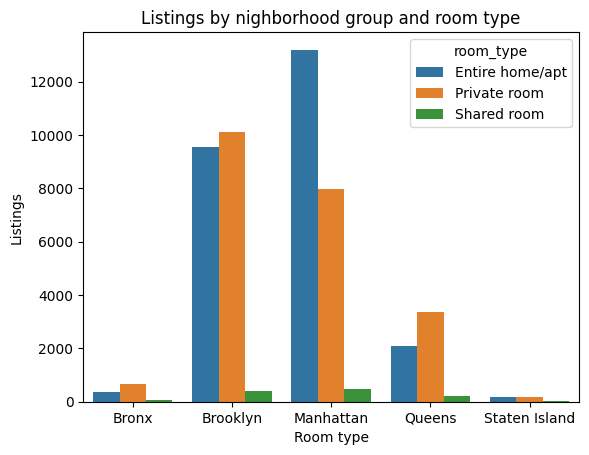

In [4]:
groups=data_df.groupby(['neighbourhood_group', 'room_type']).size()
groups_df=groups.reset_index()
groups_df.rename({0: 'Listings'}, axis=1, inplace=True)

plt.title('Listings by nighborhood group and room type')
sns.barplot(groups_df, x='neighbourhood_group', y='Listings', hue='room_type')
plt.xlabel('Room type')

plt.show()

### 2.2. Neighborhood group & room type vs numerical features

#### 2.2.1. Kruskal–Wallis test for difference in means

In [5]:
categorical_features=['neighbourhood_group','room_type']
numeric_features=['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']

ftest_results={
    'Independent var':[],
    'Dependent var':[],
    'p-value':[],
    'F-statistic':[]
}

for numeric_feature in numeric_features:
    for categorical_feature in categorical_features:
        groups=[list(x) for _, x in data_df.dropna().groupby(data_df[categorical_feature])[numeric_feature]]
        result=stats.kruskal(*groups)

        ftest_results['Independent var'].append(categorical_feature)
        ftest_results['Dependent var'].append(numeric_feature)
        ftest_results['p-value'].append(result.pvalue)
        ftest_results['F-statistic'].append(result.statistic)

ftest_results_df=pd.DataFrame.from_dict(ftest_results)
ftest_results_df.sort_values('p-value', ascending=True, inplace=True)
ftest_results_df.reset_index(drop=True, inplace=True)

#### 2.2.2. Stratified distribution plots: neighborhood group

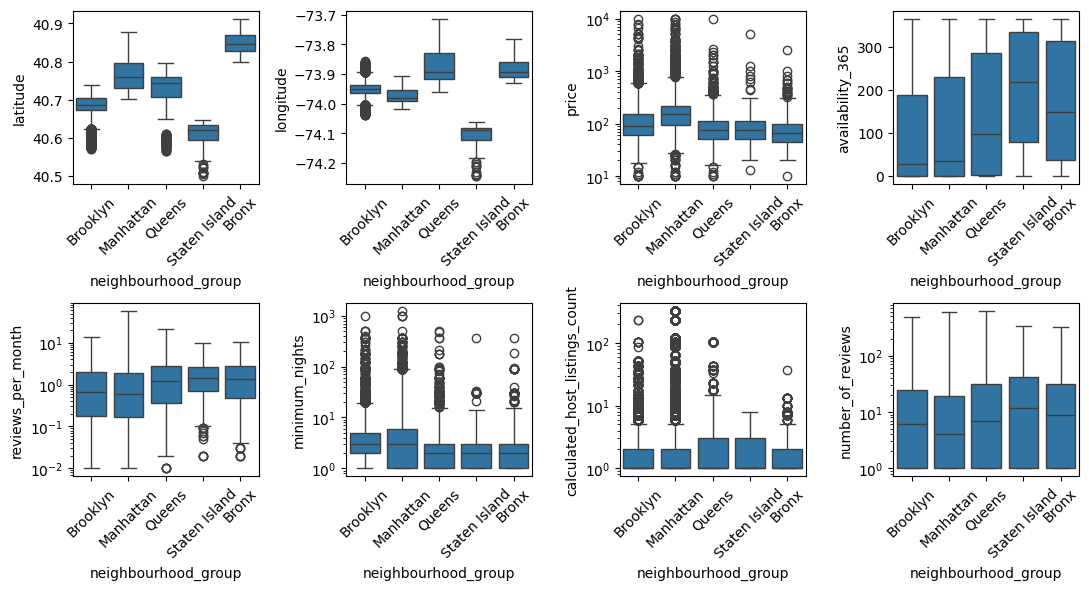

,Dependent var,p-value,F-statistic
0,latitude,0.000000e+00,25852.614173
1,longitude,0.000000e+00,17514.312174
3,price,0.000000e+00,5204.117119
7,availability_365,8.474466e-194,901.354837
8,reviews_per_month,3.570323e-159,741.513226
9,minimum_nights,2.829345e-145,677.325493
10,calculated_host_listings_count,3.721094e-91,427.179910
11,number_of_reviews,7.252508e-43,203.322493


In [6]:
ftest_results_subset_df=ftest_results_df[ftest_results_df['Independent var'] == 'neighbourhood_group']
features=ftest_results_subset_df['Dependent var']

fig, axs=plt.subplots(2,4, figsize=(11,6))
axs=axs.flatten()

for i, feature in enumerate(features):

    if stats.kurtosis(data_df[feature].dropna()) > 10:
        log_scale=True
    else:
        log_scale=False

    sns.boxplot(data_df, x='neighbourhood_group', y=feature, log_scale=log_scale, ax=axs[i])
    axs[i].tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()

ftest_results_subset_df.drop('Independent var', axis=1).head(len(ftest_results_subset_df))

#### 2.2.3. Stratified distribution plots: room type

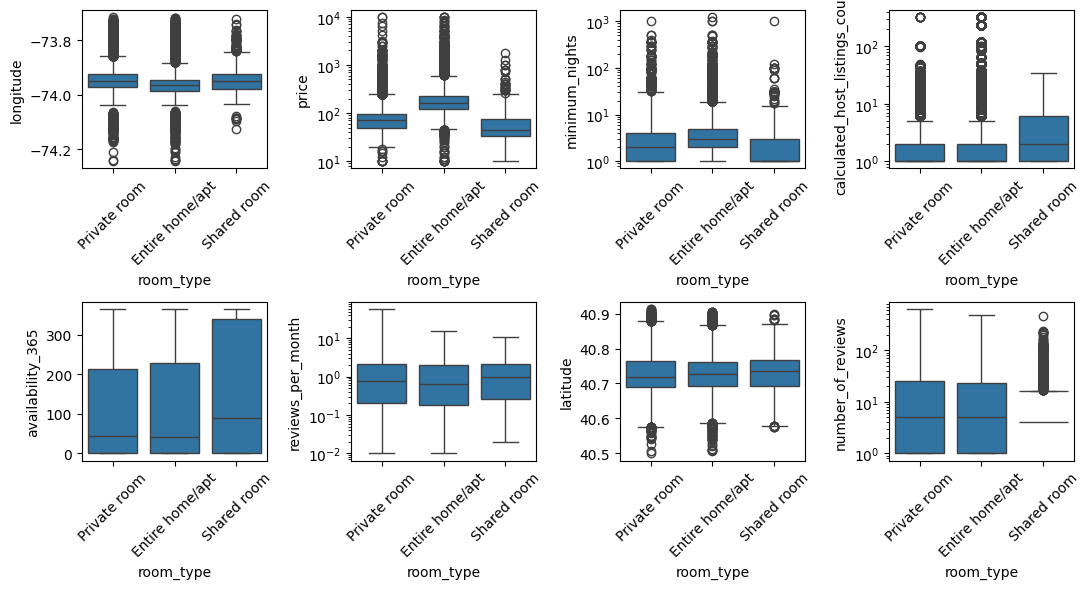

,Dependent var,p-value,F-statistic
2,longitude,0.000000e+00,2015.714941
4,price,0.000000e+00,18437.835426
5,minimum_nights,0.000000e+00,1954.348471
6,calculated_host_listings_count,0.000000e+00,2255.123897
12,availability_365,2.246947e-31,141.141131
13,reviews_per_month,2.734189e-11,48.645203
14,latitude,2.171564e-03,12.264615
15,number_of_reviews,5.534535e-03,10.393495


In [7]:
ftest_results_subset_df=ftest_results_df[ftest_results_df['Independent var'] == 'room_type']
features=ftest_results_subset_df['Dependent var']

fig, axs=plt.subplots(2,4, figsize=(11,6))
axs=axs.flatten()

for i, feature in enumerate(features):

    if stats.kurtosis(data_df[feature].dropna()) > 10:
        log_scale=True
    else:
        log_scale=False

    sns.boxplot(data_df, x='room_type', y=feature, log_scale=log_scale, ax=axs[i])
    axs[i].tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()

ftest_results_subset_df.drop('Independent var', axis=1).head(len(ftest_results_subset_df))

## 3. Numerical features

### 3.1. Correlation coefficients

In [8]:
# Features to calculate correlation coefficients for
features=[
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]

# Calculate the correlation coefficients between each pair of features
feature_pairs=list(set(tuple(sorted(pair)) for pair in product(features, features)))
correlations=funcs.get_correlations(feature_pairs, data_df)

# Sort by Spearman rank and inspect
correlations_df=pd.DataFrame.from_dict(correlations)
correlations_df.sort_values('Spearman coefficient', inplace=True, ascending=False)
correlations_df.reset_index(inplace=True, drop=True)
correlations_df.head(len(correlations_df))

,Feature 1,Feature 2,Spearman coefficient,Spearman p-value,Pearson coefficient,Pearson p-value,Pearson r-squared
0,number_of_reviews,reviews_per_month,0.706208,0.000000e+00,0.549868,0.000000e+00,0.302354
1,availability_365,calculated_host_listings_count,0.406606,0.000000e+00,0.225701,0.000000e+00,0.050941
2,availability_365,reviews_per_month,0.392126,0.000000e+00,0.185791,1.147823e-298,0.034518
3,availability_365,number_of_reviews,0.236664,0.000000e+00,0.172028,2.430803e-321,0.029593
4,calculated_host_listings_count,reviews_per_month,0.146484,3.120195e-185,-0.009421,6.334486e-02,0.000089
5,minimum_nights,price,0.101289,1.158209e-111,0.042799,2.853171e-21,0.001832
6,availability_365,price,0.086088,4.413697e-81,0.081829,2.056743e-73,0.006696
7,availability_365,minimum_nights,0.075981,1.598557e-63,0.144303,9.593642e-226,0.020823
8,calculated_host_listings_count,minimum_nights,0.064117,1.027574e-45,0.127960,1.485585e-177,0.016374
9,calculated_host_listings_count,number_of_reviews,0.056054,2.476852e-35,-0.072376,8.610142e-58,0.005238


### 3.2. Scatter plots

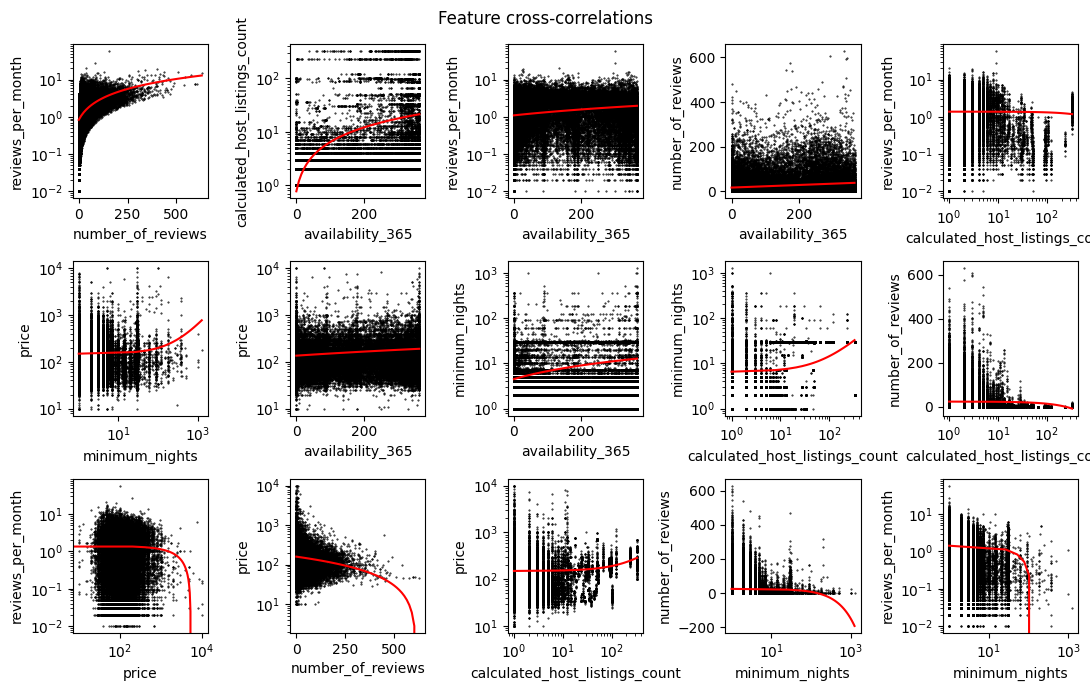

In [9]:
funcs.plot_correlations(data_df, correlations_df);